<a href="https://colab.research.google.com/github/NEHALSMITTAL/aadhaar-lifecycle-/blob/main/Aadhaar_Biometric_Update_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem** **Statement**

The objective of this project is to analyze the Aadhaar ecosystem across its full lifecycle by examining enrolment, demographic updates, and biometric updates using government‑released datasets.

The analysis aims to understand spatial distribution, age‑group participation, and temporal trends across these datasets in order to identify how Aadhaar services evolve over time and how update demand varies by region and operational context.

In [ ]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
files = glob.glob('/content/api_data_aadhar_biometric_*.csv')

df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

df.shape

(1861108, 6)

In [ ]:
df = df.rename(columns={'bio_age_17_': 'bio_age_18_plus'})

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

In [ ]:
df['date'].min(), df['date'].max()

(Timestamp('2025-03-01 00:00:00'), Timestamp('2025-12-29 00:00:00'))

In [ ]:
df['total_bio_updates'] = (df['bio_age_5_17'] + df['bio_age_18_plus'])

In [ ]:
(df['bio_age_5_17'] < 0).sum()
(df['bio_age_18_plus'] < 0).sum()
df.isna().sum().head()

,0
date,0
state,0
district,0
pincode,0
bio_age_5_17,0


In [ ]:
df['state'] = df['state'].str.strip().str.title()
df = df.drop_duplicates()

In [ ]:
df['state'].nunique()
df['state'].value_counts().tail(30)

,count
state,
Jammu And Kashmir,18597
Orissa,12767
Delhi,8784
Tripura,7949
Manipur,6252
Goa,5105
Meghalaya,4016
Arunachal Pradesh,3957
Nagaland,3666


In [ ]:
df['state'].value_counts().head(20)

,count
state,
Tamil Nadu,174934
Andhra Pradesh,160232
Uttar Pradesh,147138
Maharashtra,143609
Karnataka,135780
West Bengal,125322
Kerala,93951
Gujarat,84630
Odisha,83214


In [ ]:
state_corrections = {
    # Renaming
    'Orissa': 'Odisha',
    'Tamilnadu': 'Tamil Nadu',
    'Westbengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'Chhatisgarh': 'Chhattisgarh',
    'Uttaranchal': 'Uttarakhand',
    'Jammu & Kashmir': 'Jammu And Kashmir',

    # Puducherry
    'Pondicherry': 'Puducherry',

    # Andaman
    'Andaman & Nicobar Islands': 'Andaman And Nicobar Islands',

    # UT merger (VERY IMPORTANT)
    'Daman And Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'Daman & Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'Dadra And Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu',
    'Dadra & Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu'
}

df['state'] = df['state'].replace(state_corrections)


In [ ]:
valid_states_list = [
    'Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chhattisgarh',
    'Goa','Gujarat','Haryana','Himachal Pradesh','Jharkhand','Karnataka',
    'Kerala','Madhya Pradesh','Maharashtra','Manipur','Meghalaya','Mizoram',
    'Nagaland','Odisha','Punjab','Rajasthan','Sikkim','Tamil Nadu',
    'Telangana','Tripura','Uttar Pradesh','Uttarakhand','West Bengal',
    'Andaman And Nicobar Islands','Chandigarh',
    'Dadra And Nagar Haveli And Daman And Diu',
    'Delhi','Jammu And Kashmir','Ladakh','Lakshadweep','Puducherry'
]

df = df[df['state'].isin(valid_states_list)]


In [ ]:
df['state'].value_counts().sort_index()

,count
state,
Andaman And Nicobar Islands,1692
Andhra Pradesh,160232
Arunachal Pradesh,3957
Assam,44418
Bihar,78078
Chandigarh,1576
Chhattisgarh,30053
Dadra And Nagar Haveli And Daman And Diu,1262
Delhi,8784


In [ ]:
df['total_bio_updates'] = (df['bio_age_5_17'] + df['bio_age_18_plus'])

In [ ]:
df[['bio_age_5_17','bio_age_18_plus','total_bio_updates']].head()

,bio_age_5_17,bio_age_18_plus,total_bio_updates
0,4,2,6
1,14,19,33
2,22,37,59
3,4,4,8
4,4,7,11


In [ ]:
state_bio_totals = (df.groupby('state')['total_bio_updates'].sum().sort_values(ascending=False))

In [ ]:
top10_states = state_bio_totals.head(10)
top10_states

,total_bio_updates
state,
Uttar Pradesh,9367083
Maharashtra,9020710
Madhya Pradesh,5819736
Bihar,4778968
Tamil Nadu,4572152
Rajasthan,3927997
Andhra Pradesh,3610776
Gujarat,3147888
Karnataka,2602087


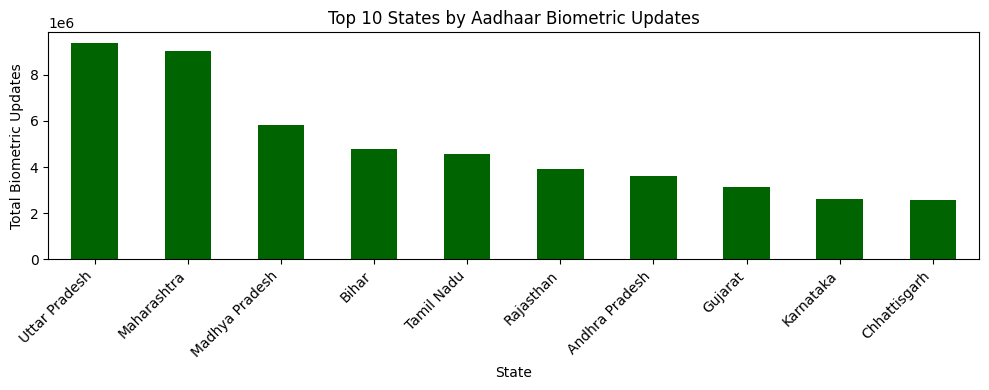

In [ ]:
top10_bio = state_bio_totals.head(10)

plt.figure(figsize=(10,4))
top10_bio.plot(kind='bar', color='darkgreen')
plt.title('Top 10 States by Aadhaar Biometric Updates')
plt.ylabel('Total Biometric Updates')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
bottom10_states = state_bio_totals.tail(10)
bottom10_states

,total_bio_updates
state,
Meghalaya,86574
Chandigarh,73552
Arunachal Pradesh,70059
Puducherry,68523
Goa,66554
Dadra And Nagar Haveli And Daman And Diu,38892
Sikkim,22576
Andaman And Nicobar Islands,19994
Ladakh,5659


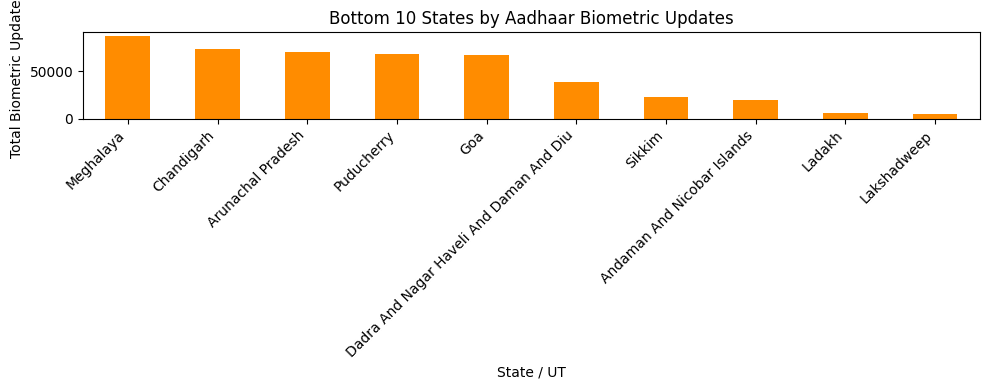

In [ ]:
bottom10_bio = state_bio_totals.tail(10)

plt.figure(figsize=(10,4))
bottom10_bio.plot(kind='bar', color='darkorange')
plt.title('Bottom 10 States by Aadhaar Biometric Updates')
plt.ylabel('Total Biometric Updates')
plt.xlabel('State / UT')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

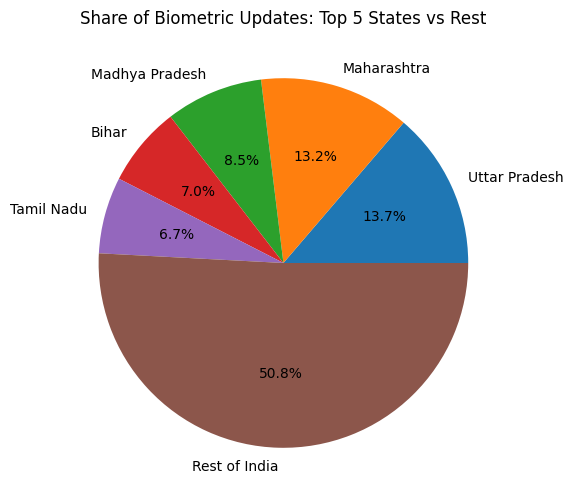

In [ ]:
top5 = state_bio_totals.head(5)
rest = state_bio_totals.iloc[5:].sum()

share_df = top5.copy()
share_df['Rest of India'] = rest

share_df.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    title='Share of Biometric Updates: Top 5 States vs Rest')
plt.ylabel('')
plt.show()

# **Spatial Insights (Biometric)**
* Biometric updates are highly concentrated in a small number of large states.

* Uttar Pradesh and Maharashtra contribute the largest share of biometric updates.

* Smaller states and Union Territories consistently show lower update volumes, reflecting population size.

# **Age‑group** **split**

In [ ]:
age_bio_totals = df[['bio_age_5_17','bio_age_18_plus']].sum()
age_bio_totals

,0
bio_age_5_17,33456642
bio_age_18_plus,34804389


In [ ]:
age_bio_share = (age_bio_totals / age_bio_totals.sum()) * 100
age_bio_share

,0
bio_age_5_17,49.012799
bio_age_18_plus,50.987201


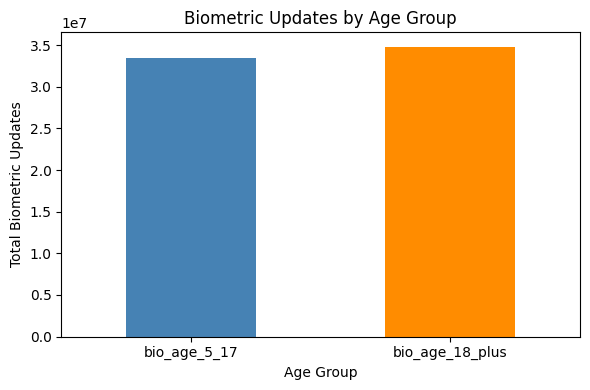

In [ ]:
age_bio_totals = df[['bio_age_5_17', 'bio_age_18_plus']].sum()

plt.figure(figsize=(6,4))
age_bio_totals.plot(
    kind='bar',
    color=['steelblue', 'darkorange']
)

plt.title('Biometric Updates by Age Group')
plt.ylabel('Total Biometric Updates')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


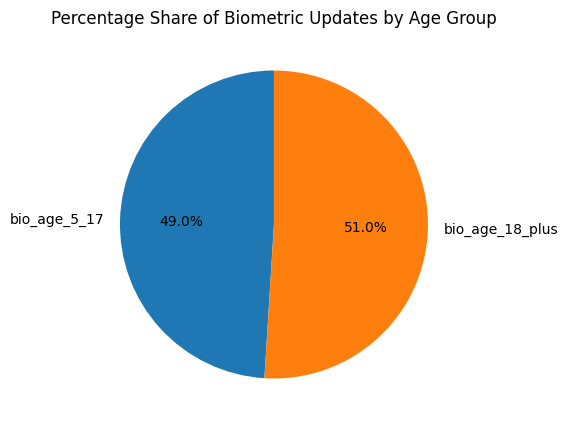

In [ ]:
age_bio_share = (age_bio_totals / age_bio_totals.sum()) * 100

plt.figure(figsize=(5,5))
age_bio_share.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90)
plt.title('Percentage Share of Biometric Updates by Age Group')
plt.ylabel('')
plt.show()

# **Age‑Group Insights (Biometric)**
* Biometric updates are nearly evenly split between age groups 5–17 and 18+.

* Unlike demographic updates, biometric updates require periodic refreshes across all life stages.

* The balanced distribution indicates biometric maintenance is accuracy‑driven, not age‑specific.

# **Monthly trend**

In [ ]:
monthly_bio = (df.groupby(df['date'].dt.to_period('M'))['total_bio_updates'].sum().reset_index())

monthly_bio['month'] = monthly_bio['date'].dt.strftime('%b %Y')
monthly_bio

,date,total_bio_updates,month
0,2025-03,8322222,Mar 2025
1,2025-04,8641679,Apr 2025
2,2025-05,7879956,May 2025
3,2025-06,7899289,Jun 2025
4,2025-07,9792552,Jul 2025
5,2025-09,6513499,Sep 2025
6,2025-10,4233846,Oct 2025
7,2025-11,6770795,Nov 2025
8,2025-12,8207193,Dec 2025


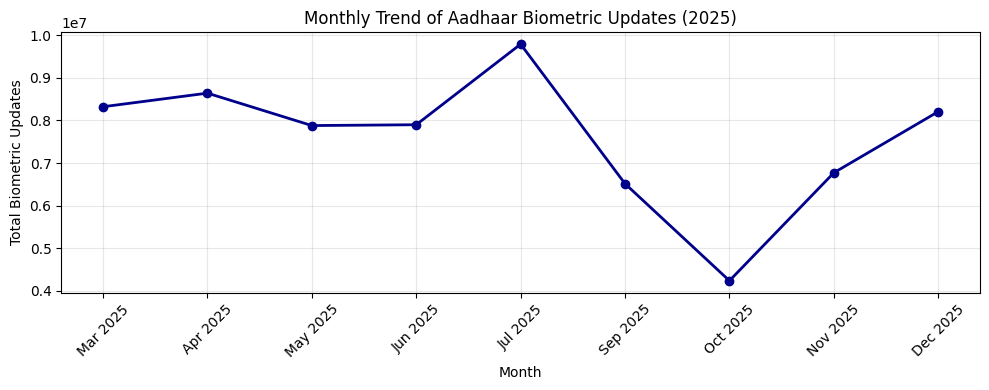

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(
    monthly_bio['month'],
    monthly_bio['total_bio_updates'],
    marker='o',
    color='darkblue',
    linewidth=2
)
plt.title('Monthly Trend of Aadhaar Biometric Updates (2025)')
plt.xlabel('Month')
plt.ylabel('Total Biometric Updates')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# **Temporal Insights (Biometric)**

* Monthly biometric updates show clear time‑based variation.

* Update activity peaks around mid‑year, followed by a decline and recovery toward year‑end.

* Similar temporal patterns at national and state levels indicate system‑wide operational cycles, not isolated events.

In [ ]:
State-Wise Trend (Biometric)(UP)

In [ ]:
up_df = df[df['state'] == 'Uttar Pradesh']
up_monthly = (up_df.groupby(up_df['date'].dt.to_period('M'))['total_bio_updates'].sum().reset_index())

up_monthly['month'] = up_monthly['date'].dt.strftime('%b %Y')


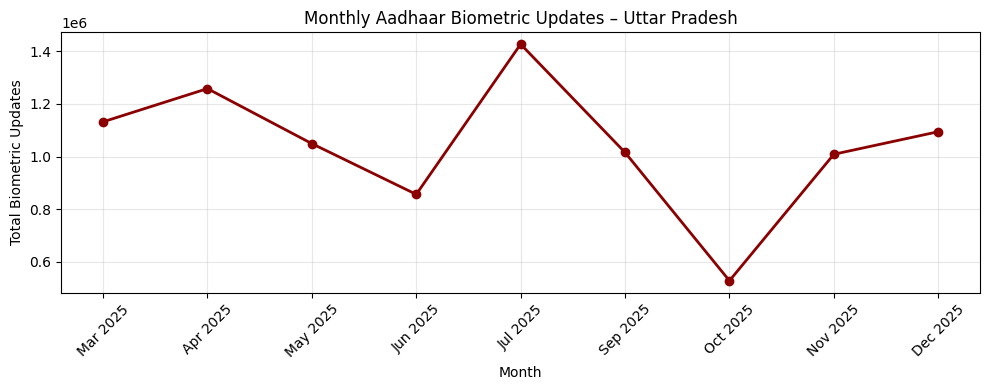

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(
    up_monthly['month'],
    up_monthly['total_bio_updates'],
    marker='o',
    color='darkred',
    linewidth=2
)
plt.title('Monthly Aadhaar Biometric Updates – Uttar Pradesh')
plt.xlabel('Month')
plt.ylabel('Total Biometric Updates')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# **COMBINED** **INSIGHTS**

# Scale Consistency Insight

* Monthly trends for Uttar Pradesh closely mirror national trends.

* This confirms that high‑volume states drive overall system behavior, validating national‑level observations.

# Operational Planning
* Monthly trends show non‑uniform demand, suggesting the need for flexible staffing at Aadhaar centres during peak months.

* High‑volume states such as Uttar Pradesh and Maharashtra may require additional infrastructure support to handle sustained update demand.

# Lifecycle‑Based Service Design
* Balanced biometric update participation across age groups indicates the need for periodic biometric refresh policies across all life stages.

* Adult‑dominated demographic updates highlight the importance of easy address and identity correction mechanisms for migrant populations.

# Regional Focus
* Lower update volumes in Union Territories reflect population size, not system under‑performance.

* Resource allocation should consider per‑capita normalization rather than absolute counts.

# Data & Monitoring
* Integrating enrolment, demographic, and biometric datasets enables end‑to‑end lifecycle monitoring of Aadhaar.

* Regular temporal monitoring can help identify seasonal or operational stress periods early.

# **Limitations**


* The datasets are transactional and may include multiple records per individual.

* Location fields contain free‑text entries, leading to residual inconsistencies.

* Analysis is based on absolute volumes, without population normalization.

* No direct causal inference is made regarding policies or external events.

# **Recommendations**
* Adopt flexible operational planning based on observed monthly demand patterns.

* Consider periodic biometric refresh strategies across all age groups.

* Use per‑capita metrics for more equitable regional comparisons.

* Integrate lifecycle datasets for continuous performance monitoring of Aadhaar services.

# **Unified Lifecycle Insight**

Aadhaar operates as a continuous identity lifecycle system: enrolment establishes identity, demographic updates maintain relevance, and biometric updates ensure authentication accuracy. Temporal patterns across all three datasets demonstrate that Aadhaar services must be designed for ongoing maintenance rather than one‑time interaction, with region‑ and time‑specific operational planning.

# **Conclusion**
This project demonstrates that Aadhaar is not a static identification system but a dynamic, lifecycle‑driven infrastructure. Enrolment data highlights initial population coverage, demographic updates reflect ongoing changes in individual identity attributes, and biometric updates emphasize the need for periodic accuracy maintenance.

By integrating spatial, demographic, and temporal analyses across all three datasets, the study highlights the importance of continuous service availability, adaptive operational planning, and data‑driven governance to support Aadhaar’s role as a national identity system.